<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW10/Tomaszewski_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 10
## Continuation of what was done in lab
#### Finish the notebook started in class (kerasmnist.ipynb in the Labs folder) by changing the neural network we built together into a convolutional neural network (see also slides)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [47]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [52]:
x_train.shape

(60000, 28, 28, 1)

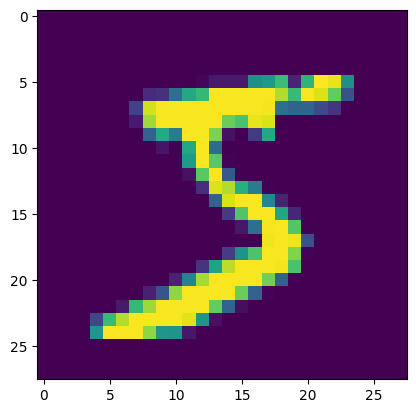

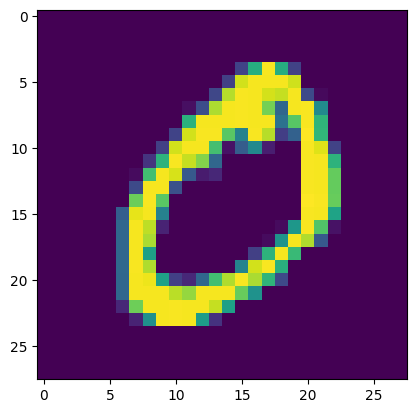

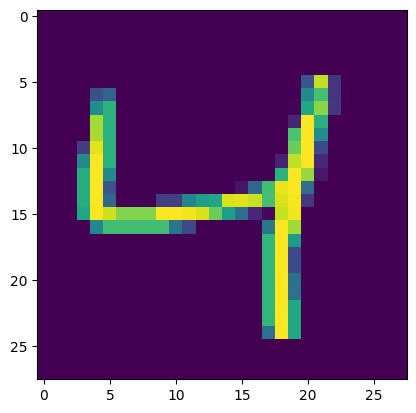

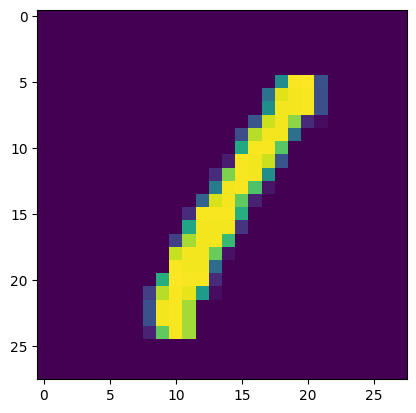

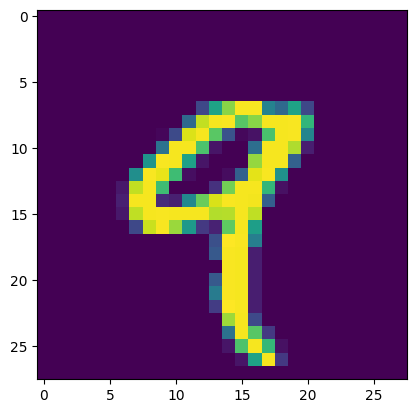

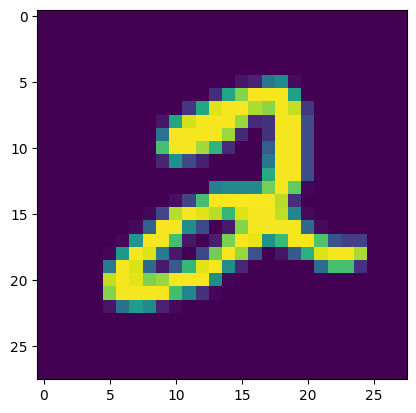

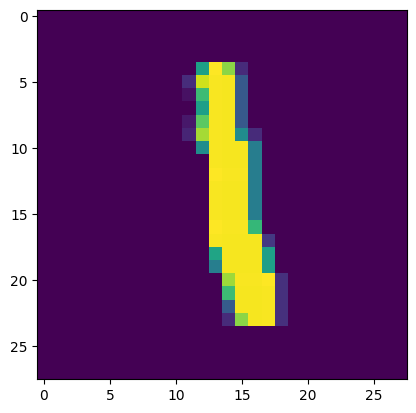

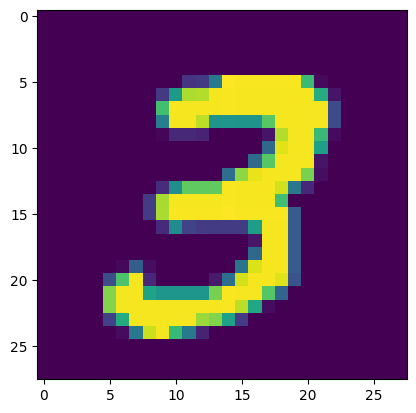

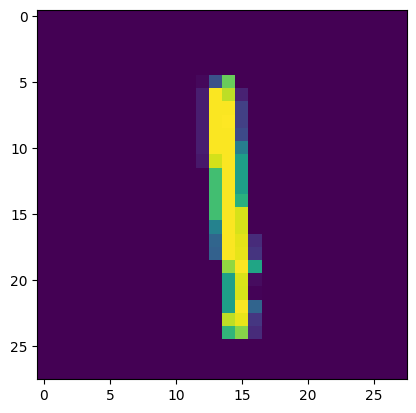

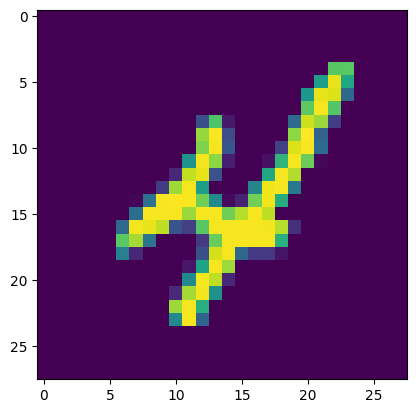

In [53]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [54]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [55]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [56]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [57]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [58]:
x_testraveled.shape

(10000, 784)

In [59]:
x_trainraveled.shape

(60000, 784)

In [60]:
# This line is redundant and can be removed or commented out after fixing mnUsLfUWPbGv
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [61]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [62]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6620 - loss: 1.4422 - val_accuracy: 0.8877 - val_loss: 0.7251
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9128 - loss: 0.4738 - val_accuracy: 0.9295 - val_loss: 0.3142
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9408 - loss: 0.2533 - val_accuracy: 0.9478 - val_loss: 0.2163
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9546 - loss: 0.1790 - val_accuracy: 0.9561 - val_loss: 0.1714
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9648 - loss: 0.1370 - val_accuracy: 0.9582 - val_loss: 0.1520
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9722 - loss: 0.1095 - val_accuracy: 0.9641 - val_loss: 0.1301
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9778 - loss: 0.0881 - val_accuracy: 0.9653 - val_loss: 0.1225
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9822 - loss: 0.0723 - val_accu

In [64]:
history.history

{'accuracy': [0.6620222330093384,
  0.9127777814865112,
  0.9407777786254883,
  0.9545555710792542,
  0.9647555351257324,
  0.9721999764442444,
  0.9777555465698242,
  0.9821555614471436,
  0.9851555824279785,
  0.9881555438041687],
 'loss': [1.4422063827514648,
  0.4738192856311798,
  0.2533431649208069,
  0.17902815341949463,
  0.1370355188846588,
  0.10951011627912521,
  0.08806394040584564,
  0.07225938141345978,
  0.059674665331840515,
  0.049527667462825775],
 'val_accuracy': [0.8877333402633667,
  0.9294666647911072,
  0.9477999806404114,
  0.9561333060264587,
  0.9581999778747559,
  0.9640666842460632,
  0.9653333425521851,
  0.968999981880188,
  0.9688000082969666,
  0.9710000157356262],
 'val_loss': [0.7250546813011169,
  0.3141780197620392,
  0.216304212808609,
  0.17138540744781494,
  0.15199626982212067,
  0.13008306920528412,
  0.12245471775531769,
  0.10956447571516037,
  0.10495089739561081,
  0.10518107563257217]}

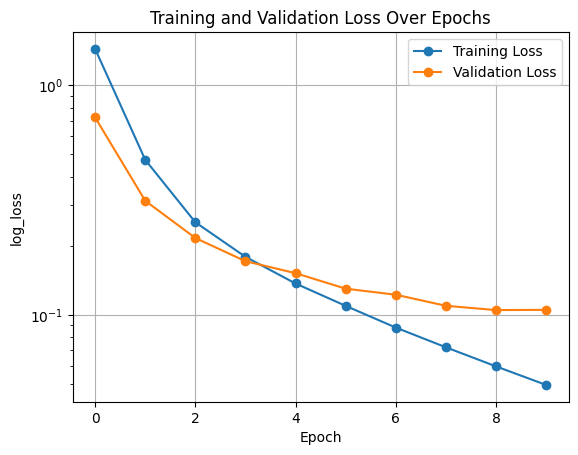

In [65]:
plt.plot(history.history['loss'], label='Training Loss', marker = "o")
plt.plot(history.history['val_loss'], label='Validation Loss', marker="o")
plt.xlabel('Epoch')
plt.title('Training and Validation Loss Over Epochs')
plt.ylabel("log_loss")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

# Fig 1:
In this figure, we are using the mnist dataset from keras in order to test our Multi-Layer Perceptron (MLP) sequential model. we are plotting the log loss of our model vs the epoch of each iteration of the model for both the training and validation loss. We run our model for 10 epochs, and are able to see that our training loss dips below our validation loss, which is consistant with overfitting, however it is good to note that we have significantly low loss.

In [66]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9738 - loss: 0.0925


[0.09247028082609177, 0.973800003528595]

# Convolution Matrix

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape

model = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.9148 - loss: 0.2816 - val_accuracy: 0.9714 - val_loss: 0.0974
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9746 - loss: 0.0823 - val_accuracy: 0.9745 - val_loss: 0.0818
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9777 - val_loss: 0.0752
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9824 - val_loss: 0.0585
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9882 - loss: 0.0359 - val_accuracy: 0.9819 - val_loss: 0.0582
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9837 - val_loss: 0.0600
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9831 - val_loss: 0.0565
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9925 - loss: 0.0224 - 

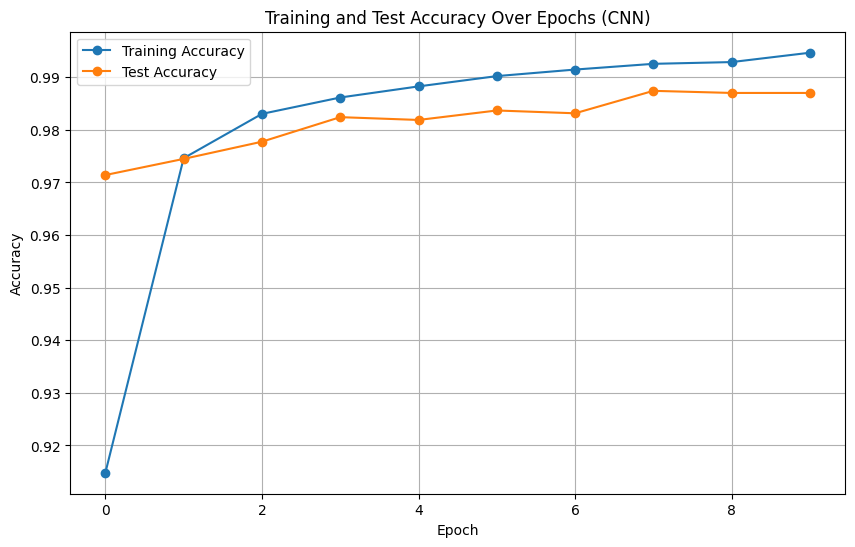

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', marker = "o")
plt.plot(cnn_history.history['val_accuracy'], label='Test Accuracy', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs (CNN)')
plt.legend()
plt.grid(True)
plt.show()

# Fig 2:
In this figure, we are still using the mnist dataset from keras, however, now we are using it in order to test our Convelution Neural Network (CNN) model. we are plotting the accuracy of our model vs the epoch of each iteration of the model for both the training and validation accuracy. We run our model for 10 epochs, and are able to see that our test auccuracy is consistantly below our traing accuracy. This means that we are overfitting, however it is good for our model that we have a fairly high accuracy.

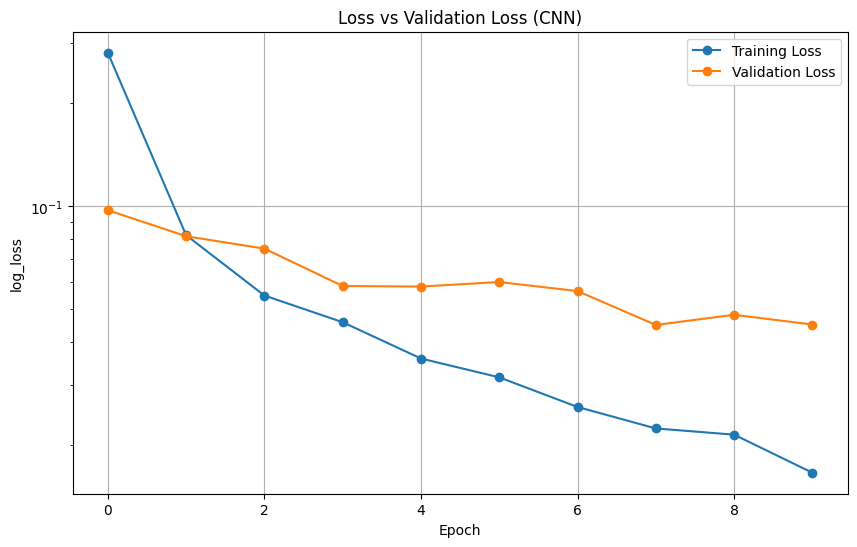

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss', marker = "o")
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss vs Validation Loss (CNN)')
plt.legend()
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()


#Fig 3:
In this figure, we are using the mnist dataset from keras in order to test our CNN. we are plotting the log loss of our model vs the epoch of each iteration of the model for both the training and validation loss. We run our model for 10 epochs, and are able to see that our training loss dips below our validation loss, which is consistant with overfitting, however it is good to note that we have significantly low loss. This loss is also lower than that of the MLP model.

# Redone with dropout

In [70]:
"""
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train[:10]
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
"""

'\n(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()\ny_train[:10]\nx_train = x_train.astype(float) / 255.\nx_test = x_test.astype(float) / 255.\ny_train = keras.utils.to_categorical(y_train, 10)\ny_test = keras.utils.to_categorical(y_test, 10)\nx_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])\nx_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])\n'

In [71]:
'''

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape


model2 = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming x_train and y_train are already loaded and preprocessed from earlier cells.
cnn_history2 = model2.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

'''

"\n\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nimport numpy as np\nimport pylab as plt\nfrom keras.models import Sequential\nfrom keras.layers import Dropout\nfrom keras.layers import Dense, Flatten\nfrom keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer\n\ninput_shape = (28, 28, 1) # Define input_shape\n\n\nmodel2 = Sequential([\n    Input(shape=input_shape), # Use Input layer as the first layer\n    Conv2D(32, kernel_size=(10, 10), activation='relu'),\n    Conv2D(64, kernel_size=(3, 3), activation='relu'),\n    MaxPooling2D(pool_size=(2, 2)),\n    Conv2D(32, kernel_size=(3, 3), activation='relu'),\n    MaxPooling2D(pool_size=(2, 2)),\n    Flatten(),\n    Dense(128, activation='relu'),\n    Dropout(0.5),\n    Dense(10, activation='softmax')\n])\n\nmodel2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Assuming x_train and y_train are already loaded and preprocessed from earlier c

In [72]:
'''
plt.figure(figsize=(10, 6))
plt.plot(cnn_history2.history['accuracy'], label='Training Accuracy', marker = "o")
plt.plot(cnn_history2.history['val_accuracy'], label='Test Accuracy', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs (CNN) With Dropout')
plt.legend()
plt.grid(True)
plt.show()

'''

'\nplt.figure(figsize=(10, 6))\nplt.plot(cnn_history2.history[\'accuracy\'], label=\'Training Accuracy\', marker = "o")\nplt.plot(cnn_history2.history[\'val_accuracy\'], label=\'Test Accuracy\', marker = \'o\')\nplt.xlabel(\'Epoch\')\nplt.ylabel(\'Accuracy\')\nplt.title(\'Training and Test Accuracy Over Epochs (CNN) With Dropout\')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n'

plt.figure(figsize=(10, 6))
plt.plot(cnn_history2.history['loss'], label='Training Loss', marker = "o")
plt.plot(cnn_history2.history['val_loss'], label='Validation Loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss vs Validation Loss with Dropout')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
!nvidia-smi

Wed Nov 19 02:09:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   58C    P8             17W /  115W |     305MiB /   6144MiB |     31%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----